In [161]:
import pandas as pd

In [162]:
df = pd.read_csv("/home/roger/send_data/cluster/2025-07.csv", sep="|")
df = df[df['State'] == 'COMPLETED']

def get_h(df):
    df["Start"] = pd.to_datetime(df["Start"])
    df["End"]   = pd.to_datetime(df["End"])

    df["elapsed_sec"] = (df["End"] - df["Start"]).dt.total_seconds()
    df["cpu_hours"]   = (df["elapsed_sec"] / 3600) * df["AllocCPUS"] 
    return df
# seconds x month x cpus
total_cpu_hours = 31*24*152

In [163]:
df = get_h(df)

df.groupby("User")["cpu_hours"].sum().sort_values(ascending=False)
(df['cpu_hours'].sum() / total_cpu_hours) * 100

np.float64(114.32429661463246)

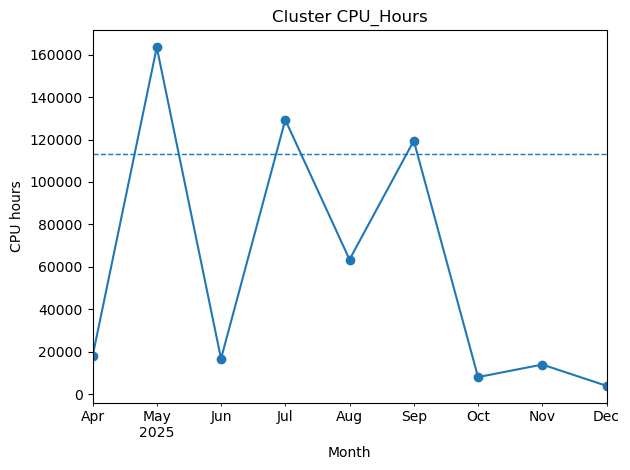

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import calendar

TOTAL_CPUS = 152
FOLDER = Path("/home/roger/send_data/cluster")

def load_month(p):
    df = pd.read_csv(p, sep="|")
    df = df[df["State"] == "COMPLETED"].copy()
    df["Start"] = pd.to_datetime(df["Start"])
    df["End"]   = pd.to_datetime(df["End"])
    df["elapsed_sec"] = (df["End"] - df["Start"]).dt.total_seconds()
    df["cpu_hours"]   = df["elapsed_sec"] * df["AllocCPUS"] / 3600

    month = pd.to_datetime(p.stem, format="%Y-%m")  # filename like 2025-07.csv
    df["month"] = month.to_period("M")
    return df

all_df = pd.concat([load_month(p) for p in sorted(FOLDER.glob("2025-??.csv"))], ignore_index=True)

# ---- monthly stats ----
monthly_cpu_hours = all_df.groupby("month")["cpu_hours"].sum().sort_index()


# ---- line plot (% usage) ----
monthly_cpu_hours.plot(marker="o")
plt.ylabel("CPU hours")
plt.axhline(total_cpu_hours, linestyle="--", linewidth=1, label="Max capacity")

plt.xlabel("Month")
plt.title("Cluster CPU_Hours")
plt.tight_layout()
plt.show()


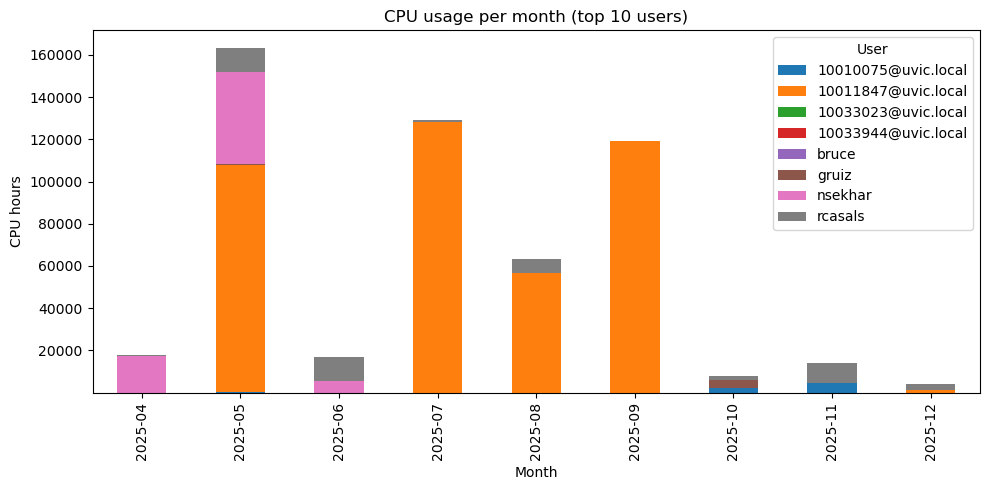

In [170]:
user_month = all_df.groupby(["month","User"])["cpu_hours"].sum().sort_index()


top_users = user_month.groupby("User").sum().nlargest(10).index
user_month[user_month.index.get_level_values("User").isin(top_users)] \
    .unstack("User") \
    .plot(kind="bar", stacked=True, figsize=(10,5))

plt.ylabel("CPU hours")
plt.xlabel("Month")
plt.title("CPU usage per month (top 10 users)")
plt.tight_layout()
plt.show()


In [154]:
monthly_capacity

month
2025-04   NaN
2025-05   NaN
2025-06   NaN
2025-07   NaN
2025-08   NaN
2025-09   NaN
2025-10   NaN
2025-11   NaN
2025-12   NaN
Freq: M, dtype: float64